In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os
import random
import datetime
import re
import json

glob.glob("studies/*/config.yml")[0].split("/")[1]

'moralnet'

In [5]:
json.dumps(nx.node_link_data(graphs[0]))

'{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"id": 0}, {"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}, {"id": 8}, {"id": 9}, {"id": 10}, {"id": 11}, {"id": 12}, {"id": 13}, {"id": 14}, {"id": 15}], "links": [{"source": 0, "target": 15}, {"source": 0, "target": 2}, {"source": 0, "target": 14}, {"source": 0, "target": 11}, {"source": 0, "target": 13}, {"source": 1, "target": 2}, {"source": 1, "target": 15}, {"source": 1, "target": 12}, {"source": 2, "target": 3}, {"source": 2, "target": 4}, {"source": 2, "target": 11}, {"source": 3, "target": 4}, {"source": 3, "target": 5}, {"source": 4, "target": 6}, {"source": 4, "target": 14}, {"source": 4, "target": 8}, {"source": 4, "target": 9}, {"source": 4, "target": 5}, {"source": 5, "target": 6}, {"source": 5, "target": 9}, {"source": 6, "target": 7}, {"source": 6, "target": 12}, {"source": 7, "target": 8}, {"source": 7, "target": 9}, {"source": 8, "target": 10}, {"source": 10, "target": 11}, {"

Initializing source files...
Opened moralnet config.yml
Value of omega: 0.49187956664147153


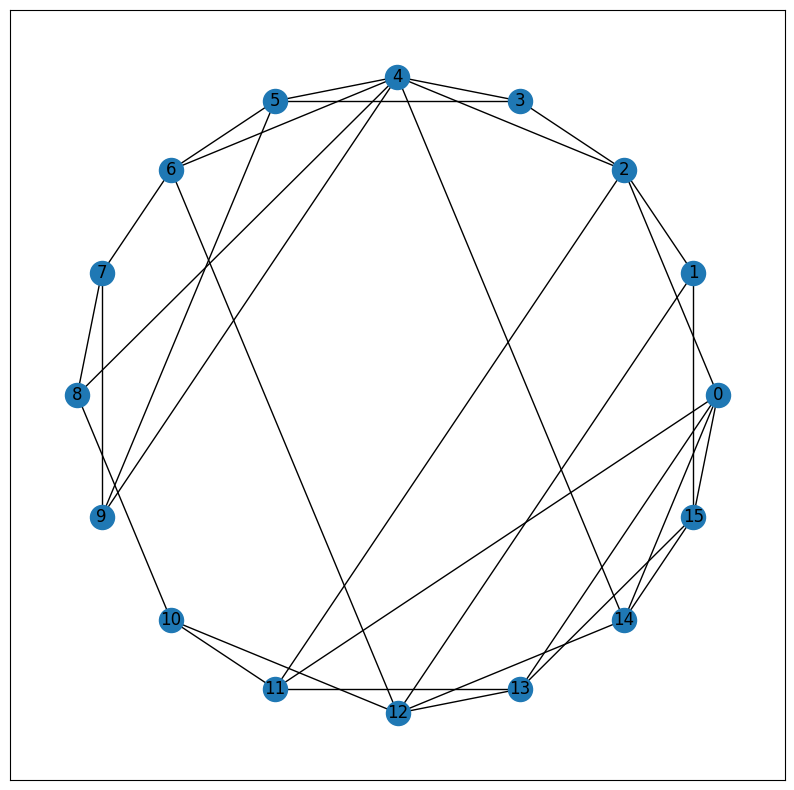

In [3]:
from src import generate

graphs = generate("moralnet", test=False, write=True)

In [5]:
nx.smallworld.omega(graphs[0])

0.5059128630705392

In [81]:
from copy import deepcopy

nodes = list(graphs[0].nodes())
edge_map = {
    node: set(edge_map[node]) for node in deepcopy(nx.to_dict_of_lists(graphs[0]))
}

edge_map

{0: {1, 2, 7, 14},
 1: {0, 3, 7, 15},
 2: {0, 3, 4},
 3: {1, 2, 5, 13},
 4: {2, 5, 6},
 5: {3, 4, 6, 15},
 6: {4, 5, 7, 8},
 7: {0, 1, 6, 9},
 8: {6, 9, 10, 11, 12},
 9: {7, 8, 10, 11, 15},
 10: {8, 9, 11, 12},
 11: {8, 9, 10, 13},
 12: {8, 10, 14},
 13: {3, 11, 14, 15},
 14: {0, 12, 13, 15},
 15: {1, 5, 9, 13, 14}}

In [82]:
nodes_in_round = set()
edges_in_round = list()

for node, others in edge_map.items():
    if node in nodes_in_round:
        continue

    available_others = others.difference(nodes_in_round)
    if len(available_others) == 0:
        print(f"Node {node} has no available others to pair with")
        continue

    paired_other = random.choice(tuple(available_others))

    nodes_in_round.update([node, paired_other])
    edges_in_round.append([node, paired_other])

In [83]:
edges_in_round

[[0, 1], [2, 3], [4, 6], [5, 15], [7, 9], [8, 10], [11, 13], [12, 14]]

In [83]:
nx.node_link_data(graphs[0])

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 12},
  {'id': 13},
  {'id': 14},
  {'id': 15}],
 'links': [{'source': 0, 'target': 1},
  {'source': 0, 'target': 15},
  {'source': 0, 'target': 14},
  {'source': 0, 'target': 12},
  {'source': 0, 'target': 7},
  {'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 1, 'target': 15},
  {'source': 2, 'target': 3},
  {'source': 2, 'target': 4},
  {'source': 3, 'target': 4},
  {'source': 3, 'target': 5},
  {'source': 3, 'target': 6},
  {'source': 3, 'target': 11},
  {'source': 4, 'target': 6},
  {'source': 4, 'target': 9},
  {'source': 5, 'target': 7},
  {'source': 5, 'target': 8},
  {'source': 6, 'target': 12},
  {'source': 7, 'target': 14},
  {'source': 8, 'target': 9},
  {'source': 8, 'target': 10},
  {'source': 9, 'target': 10},
  {'source':